# AB testing

Parameters:

- $P_A$ : True click through rate for group A
- $P_B$ : True click through rate for group B
- $N_A$ : Number of cases for group A
- $N_B$ : Number of cases for group B

In [1]:
library(data.table)
library(lubridate)
library(ggplot2)
options(run.main=FALSE)
source("ab.R")


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
# Choose parameters:
pA <- 0.06 # True click through rate for group A
pB <- 0.06 # True click through rate for group B
nA <- 500 # Number of cases for group A
nB <- 500 # Number of cases for group B

### Simulate data

In [3]:
sim_df = function(pA,pB,nA,nB){
  
    set.seed(47849)
    data <- data.table(group = rep(c("A", "B"), c(nA, nB)),
                       timestamp = sample(seq(as_datetime('2016-06-02'),
                                              as_datetime('2016-06-09'), by = 1), nA+nB),
                       clickedTrue = as.factor(c(rbinom(n = nA, size = 1, prob = pA),
                                                 rbinom(n = nB, size = 1, prob = pB))))



    # Order data by timestamp
    setorder(data, timestamp)
    levels(data$clickedTrue) <- c("0", "1")
    return(data)
}


In [4]:
df = sim_df(pA,pB,nA,nB)
head(df)

group,timestamp,clickedTrue
A,2016-06-02 00:05:53,0
B,2016-06-02 00:19:26,0
A,2016-06-02 00:24:21,0
A,2016-06-02 00:25:13,1
B,2016-06-02 00:48:31,0
A,2016-06-02 00:54:26,0


% difference  0 
significance  0.6849628

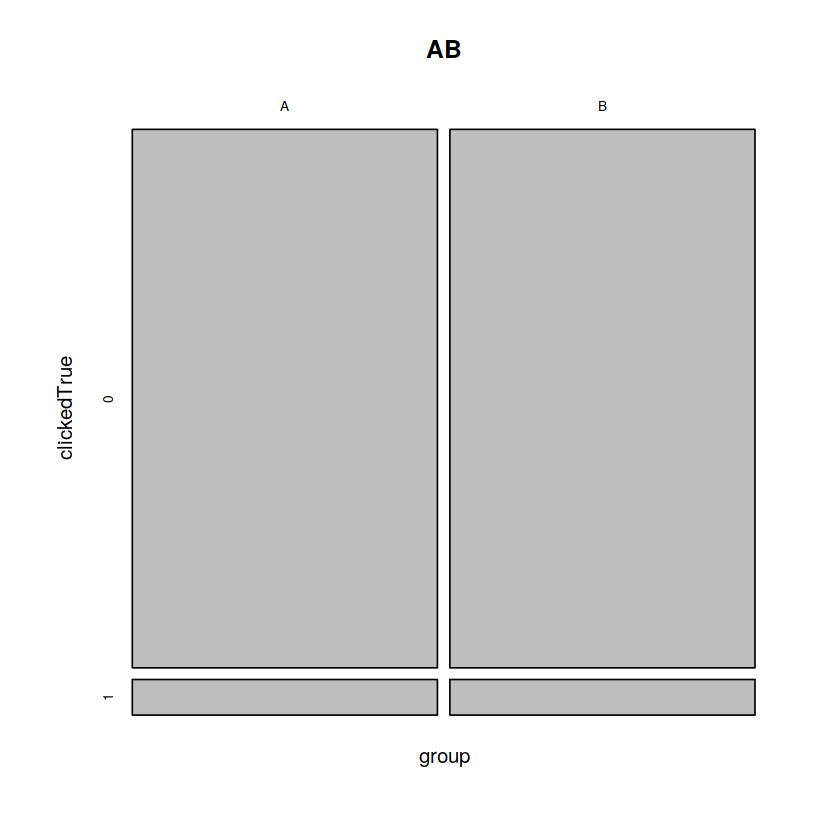

In [5]:
ab <- ABTestDyn$new(df)
  
ab$plot_mos()
cat('% difference ',ab$prc_diff(),'\n')

cat('significance ', ab$p_value(min(df$timestamp),
                              '2016-06-07'))

In [6]:
cat('significance ', ab$p_value(min(df$timestamp),
                              min(df$timestamp)))

Warning message in prop.test(table(df[timestamp >= from_dt & timestamp <= to_dt, :
“Chi-squared approximation may be incorrect”

significance  1

## Change proportions

% difference  36.73469 
significance  0.04752708

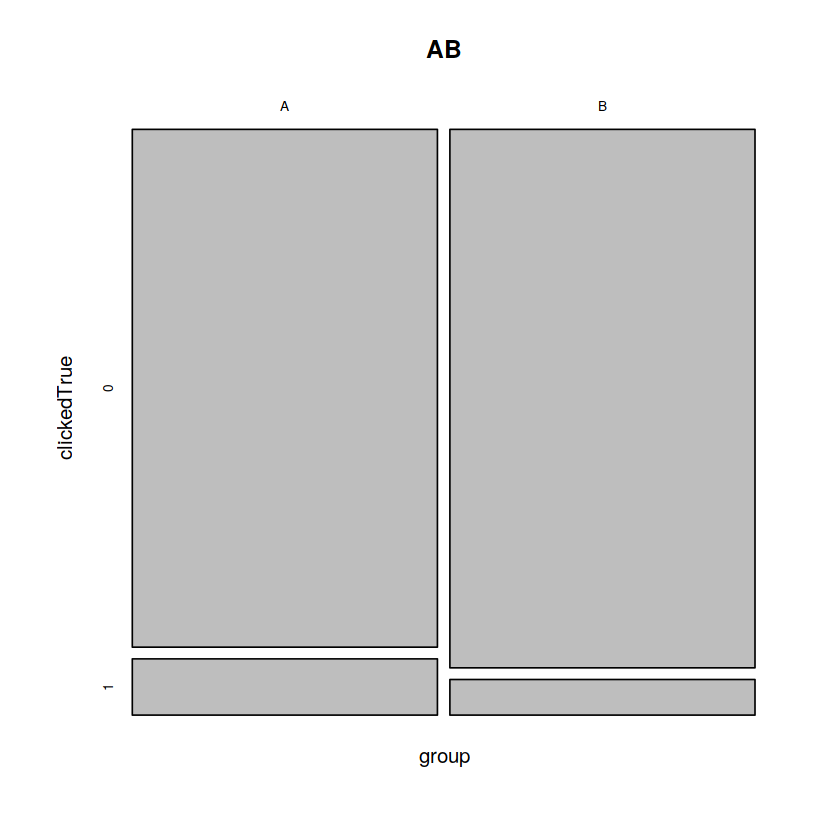

In [7]:
df = sim_df(0.1,pB,nA,nB)
ab <- ABTestDyn$new(df)
  
ab$plot_mos()
cat('% difference ',ab$prc_diff(),'\n')
cat('significance ', ab$p_value(min(df$timestamp),max(df$timestamp)))